## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten - Hauptstudie 2018
# Datenbereinigung der begleitenden Lehrendenbefragung


#### Werkzeuge und Daten importieren

In [53]:
import pandas as pd
import numpy as np
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
Rohdaten = pd.read_csv('D:\Daten\DISS\Daten\EstrategiasProfesoresKienberger2018.tsv', sep = '\t', encoding='utf-16')

In [55]:
Rohdaten.head(4)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q5_8,D-Q5_8_TEXT,D-Q5_9,D-Q5_9_TEXT,D-Q5_10,D-Q5_10_TEXT,D-Q5a,D-Q6,E-Q1,E-Q2
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Comentarios (opcional):,Género:,"Si lo desea, puede escribir un comentario y da...",¿Le interesa saber más sobre este proyecto de ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID102_8""}","{""ImportId"":""QID102_8_TEXT""}","{""ImportId"":""QID102_9""}","{""ImportId"":""QID102_9_TEXT""}","{""ImportId"":""QID102_10""}","{""ImportId"":""QID102_10_TEXT""}","{""ImportId"":""QID85_TEXT""}","{""ImportId"":""QID54""}","{""ImportId"":""QID94_TEXT""}","{""ImportId"":""QID118_TEXT""}"
2,2018-02-06 09:50:44,2018-02-06 09:53:21,0,2.154.118.68,100,156,1,2018-02-06 09:53:21,R_29b01e77g53hsq3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Test,NaN
3,2018-02-07 09:07:11,2018-02-07 09:54:49,0,212.128.135.32,100,2858,1,2018-02-07 09:54:51,R_1dN6Q3m9LpWBIOS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
Rohdaten = Rohdaten.drop(1)
Rohdaten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q5_8,D-Q5_8_TEXT,D-Q5_9,D-Q5_9_TEXT,D-Q5_10,D-Q5_10_TEXT,D-Q5a,D-Q6,E-Q1,E-Q2
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Idiomas Indique su(s) lengua(s) materna(s)...,Comentarios (opcional):,Género:,"Si lo desea, puede escribir un comentario y da...",¿Le interesa saber más sobre este proyecto de ...
2,2018-02-06 09:50:44,2018-02-06 09:53:21,0,2.154.118.68,100,156,1,2018-02-06 09:53:21,R_29b01e77g53hsq3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Test,NaN
3,2018-02-07 09:07:11,2018-02-07 09:54:49,0,212.128.135.32,100,2858,1,2018-02-07 09:54:51,R_1dN6Q3m9LpWBIOS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Glossar erstellen

In [57]:
gloss = pd.DataFrame(Rohdaten.loc[0])

In [58]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

In [59]:
Rohdaten = Rohdaten.drop(0).reset_index(drop=True)
Rohdaten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q5_8,D-Q5_8_TEXT,D-Q5_9,D-Q5_9_TEXT,D-Q5_10,D-Q5_10_TEXT,D-Q5a,D-Q6,E-Q1,E-Q2
0,2018-02-06 09:50:44,2018-02-06 09:53:21,0,2.154.118.68,100,156,1,2018-02-06 09:53:21,R_29b01e77g53hsq3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Test,NaN
1,2018-02-07 09:07:11,2018-02-07 09:54:49,0,212.128.135.32,100,2858,1,2018-02-07 09:54:51,R_1dN6Q3m9LpWBIOS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-07 10:09:44,2018-02-07 10:20:49,0,193.144.82.98,100,664,1,2018-02-07 10:20:49,R_3PKNmaCMDVT9uin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Latein, Altgriechisch in der Schule mitgenomme...",1,NaN,sina.menrad@usc.es


In [60]:
Rohdaten.shape

(120, 88)

### Gültige Daten auswählen

##### Tests entfernen:

In [61]:
Daten = Rohdaten[Rohdaten['DistributionChannel'] != 'preview'].reset_index(drop=True)
Daten.shape

(119, 88)

In [68]:
ind_test = []
for j, wert in enumerate(Daten['E-Q1']):
    if 'Test' in str(wert):
        ind_test.append(j)
print(ind_test)

[0]


In [69]:
Daten = Daten.drop(ind_test).reset_index(drop=True)

##### Unpassende TN entfernen:

Lehrende an nicht-universitären Einrichtungen gehören nicht zur Zielgruppe der Befragung. Diese TN müssen daher von der Analyse ausgeschlossen werden.

In [70]:
Daten['D-Q1a'].value_counts()

EOI                                         1
ESCUELA OFICIAL DE IDIOMAS                  1
BOLZANO                                     1
Enseñanza Media.IES JM Llompart de Palma    1
Universidad Pablo de Olavide Sevilla        1
Name: D-Q1a, dtype: int64

In [71]:
for i, wert in enumerate(Daten['D-Q1a']):
    if 'Olavide' in str(wert):
        Daten.loc[i,'D-Q1'] = 49

In [72]:
ind_other = []
for i, wert in enumerate(Daten['D-Q1a']):
    if 'EOI' in str(wert):
        ind_other.append(i)
    elif 'ESCUELA' in str(wert):
        ind_other.append(i)
    elif 'Palma' in str(wert):
        ind_other.append(i)
    elif 'BOLZANO' in str(wert):
        ind_other.append(i)

In [73]:
ind_other

[70, 78, 94, 100]

In [75]:
Daten = Daten.drop(ind_other).reset_index(drop=True)

##### Fertig ausgefüllte Fragebögen:

In [78]:
Finished = Daten[Daten['Finished'] == '1'].reset_index(drop=True)
Finished.shape

(46, 88)

##### Fragebögen mit fehlenden Werten ermitteln:

In [79]:
def count_nan(row):
    cnt = 0
    for el in row:
        if (str(el) == 'nan'):
            cnt = cnt + 1
    return cnt*100/len(row)

In [80]:
porc_nan = []
for i in range(Finished.shape[0]):
    porc_nan.append(count_nan(Finished.loc[i]))

In [81]:
Finished['porc_nan'] = porc_nan

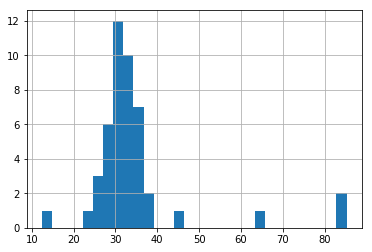

In [82]:
Finished['porc_nan'].hist(bins=30)

In [83]:
Finished[Finished['porc_nan'] > 60].index

Int64Index([0, 25, 38], dtype='int64')

In [84]:
#Finished.loc[26]

In [85]:
Finished = Finished[Finished['porc_nan'] < 60]
Finished.shape

(43, 89)

In [86]:
Finished = Finished.reset_index(drop=True)

In [87]:
Datenber = Finished

### Art der Werte kontrollieren und anpassen

In [88]:
#Datenber.dtypes

##### Multiple-Choice-Format

Multiple-Choice-Antworten werden jeweils in einem Feld der Excel-Tabelle unter einer Variable (z.B. Frage "B-Q1") gespeichert. Um diese auswerten zu können, müssen diese Felder aufgeteilt werden. Dazu werden sogenannte "Dummy-Variablen" erstellt. Für jede in der Befragung gewählte Multiple-Choice-Antwort wird eine solche Variable erstellt und als neue Spalte in die Excel-Tabelle eingefügt. Dieser Vorgang wird für alle Multiple-Choice-Fragen durchgeführt.

*Anzahl der Dummy-Variablen feststellen:*

In [89]:
def get_itemlist(df,var):
    vals = df[var].dropna().reset_index(drop=True)
    lista_strings = vals[0].split(',')
    for val in vals:
        lst = str(val).split(',')
        lst_add = [el for el in lst if el not in lista_strings]
        if lst_add:
            lista_strings = lista_strings + lst_add
    return list(sort([int(el) for el in lista_strings]))

*Dummy-Variablen erstellen:*

In [90]:
def dummies_multiple(df, col):
    # leere Tabelle erstellen
    columns = [str(el) for el in get_itemlist(df,col)]
    ind = range(df.shape[0])
    df_int = pd.DataFrame(index=ind, columns=columns)
    df_int = df_int.fillna(0)
    
    for i in ind:
        if str(df.loc[i,col]) != 'nan':
            list1 = str(df.loc[i,col]).split(',')
            df_int.loc[i,list1] = np.ones(len(list1), dtype = int)
    
    df_int.columns = ['{}_{}'.format(col,column) for column in columns]
    return df_int

In [91]:
def insert_dummies(df,col):
    df_insert = dummies_multiple(df,col)
    return pd.concat([ df.loc[:,:col], df_insert, df.loc[:,col:] ], axis = 1).drop(col,axis = 1)

In [92]:
var_choice = ['B-Q1','D-Q2','D-Q3']

In [93]:
for col in var_choice:
    Datenber = insert_dummies(Datenber,col)

##### Format für fehlende Werte

In [94]:
Datenber = Datenber.fillna(0)

Fehlende Werte werden grundsätzlich als "NaN" definiert, was zu Problemen bei der Analyse führen kann. Da der Wert "0" nur in wenigen Fragen vorkommt, bei denen keine Werte fehlen, kann "NaN" durch "0" ersetzt werden.

##### Numerische Werte

*Auswahl der Spalten ohne Texteingabe:*

In [95]:
#gloss.loc['D-Q1a'][0]

In [96]:
gloss1 = pd.DataFrame(Datenber.loc[0])

In [97]:
liste_ohne_komm = [ind for ind in gloss1.index if 'comentario' not in str(gloss1.loc[ind][0]).lower()]

In [98]:
liste_ohne_text = [col for col in liste_ohne_komm if 'text' not in col.lower()]

In [99]:
def get_var_num(lst,var):
    return [col for col in lst if var not in col]

In [100]:
liste_fragen_num = [col for col in liste_ohne_text if 'Q' in col]
_vars_ = ['A-Q1a','B-Q1a','B-Q2a','B-Q3a','D-Q1a','D-Q2a','D-Q2b','D-Q3a','D-Q5a','E-Q1','E-Q2']
for var in _vars_:
    liste_fragen_num = get_var_num(liste_fragen_num,var)

*Verschiedene Formate in numerische Werte umwandeln:*

In [101]:
def Werte_numm(s):
    return pd.to_numeric(s, downcast='integer')

Als Text (object) gelesene Werte werden in numerische Werte umgewandelt, bevorzugt wird das Datenformat "integer" verwendet. Bei negativen Werten oder Dezimalstellen wird "float" verwendet.

In [102]:
Datenber['D-Q5_7'].unique()

array([0, '3', '4', '2'], dtype=object)

In [103]:
for el in liste_fragen_num:
    Datenber[el] = Werte_numm(Datenber[el])

In [104]:
lista_float = []
for i, tipo in enumerate(Datenber.dtypes):
    if 'float' in str(tipo):
        lista_float.append(Datenber.columns[i])
lista_float

['D-Q4', 'porc_nan']

In [105]:
Datenber.dtypes

StartDate                 object
EndDate                   object
Status                    object
IPAddress                 object
Progress                  object
Duration (in seconds)     object
Finished                  object
RecordedDate              object
ResponseId                object
RecipientLastName          int64
RecipientFirstName         int64
RecipientEmail             int64
ExternalReference          int64
LocationLatitude          object
LocationLongitude         object
DistributionChannel       object
UserLanguage              object
A-Q1_1                      int8
A-Q1_2                      int8
A-Q1_3                      int8
A-Q1_4                      int8
A-Q1_5                      int8
A-Q1_6                      int8
A-Q1_7                      int8
A-Q1_8                      int8
A-Q1_9                      int8
A-Q1a                     object
B-Q1_1                      int8
B-Q1_2                      int8
B-Q1_3                      int8
          

### Daten speichern

In [106]:
Datenber.to_pickle('D:\Daten\DISS\Daten\Estrategias_Profesores_2018_ber')

In [107]:
Datenber.to_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2018_ber.xlsx',encoding='utf-16')

In [108]:
Datenber.to_csv('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2018_ber.csv',encoding='utf-16')

In [109]:
gloss.to_pickle('D:\Daten\DISS\Daten\GlossProf2018')